<a href="https://colab.research.google.com/github/jibin-sebastian/Learnings/blob/main/Churn_Project_sample.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Artificial Neural Network
# Part 1 - Data Preprocessing

# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
#https://www.kaggle.com/shubh0799/churn-modelling/version/1
# Importing the dataset
dataset = pd.read_csv('/content/Churn_Modelling.csv')

In [3]:
#create independed and depended variable.
X = dataset.iloc[:, 3:13]
y = dataset.iloc[:, 13]

In [5]:
X

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10
...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77
9997,709,France,Female,36,7,0.00,1,0,1,42085.58
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52


In [7]:
y

0       1
1       0
2       1
3       0
4       0
       ..
9995    0
9996    0
9997    1
9998    1
9999    0
Name: Exited, Length: 10000, dtype: int64

In [8]:
#Create dummy variables
geography=pd.get_dummies(X["Geography"],drop_first=True)
gender=pd.get_dummies(X['Gender'],drop_first=True)

In [9]:
## Concatenate the Data Frames
X=pd.concat([X,geography,gender],axis=1)
## Drop Unnecessary columns
X=X.drop(['Geography','Gender'],axis=1)

In [10]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [12]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [15]:
# Part 2 - Now let's make the ANN!

# Importing the Keras libraries and packages
import keras
from keras.models import Sequential
from keras.layers import Dense #for creating hiden layers
from keras.layers import LeakyReLU,PReLU,ELU
from keras.layers import Dropout #dropout is a regularization parameter.

In [16]:
# Initialising the ANN
classifier = Sequential()

In [20]:
# Adding the input layer and the first hidden layer
classifier.add(Dense(units = 6, kernel_initializer = 'he_uniform',activation='relu',input_dim = 11))

In [22]:
# Adding the second hidden layer
classifier.add(Dense(units = 6, kernel_initializer = 'he_uniform',activation='relu'))

In [24]:
# Adding the output layer
classifier.add(Dense(units = 1, kernel_initializer = 'glorot_uniform', activation = 'sigmoid'))

In [25]:
# Compiling the ANN
#
classifier.compile(optimizer = 'Adamax', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [27]:
classifier.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 6)                 72        
                                                                 
 dense_1 (Dense)             (None, 6)                 42        
                                                                 
 dense_2 (Dense)             (None, 1)                 7         
                                                                 
Total params: 121
Trainable params: 121
Non-trainable params: 0
_________________________________________________________________


In [30]:
# Fitting the ANN to the Training set
model_history=classifier.fit(X_train, y_train,validation_split=0.33, batch_size = 10, epochs = 100)

Epoch 1/100
536/536 [==============================] - 4s 4ms/step - loss: 0.6427 - accuracy: 0.7179 - val_loss: 0.5904 - val_accuracy: 0.7562
Epoch 2/100
536/536 [==============================] - 2s 3ms/step - loss: 0.5564 - accuracy: 0.7772 - val_loss: 0.5335 - val_accuracy: 0.7925
Epoch 3/100
536/536 [==============================] - 1s 2ms/step - loss: 0.5111 - accuracy: 0.7940 - val_loss: 0.5001 - val_accuracy: 0.7944
Epoch 4/100
536/536 [==============================] - 1s 2ms/step - loss: 0.4851 - accuracy: 0.7964 - val_loss: 0.4807 - val_accuracy: 0.7952
Epoch 5/100
536/536 [==============================] - 1s 2ms/step - loss: 0.4687 - accuracy: 0.7966 - val_loss: 0.4673 - val_accuracy: 0.7970
Epoch 6/100
536/536 [==============================] - 1s 2ms/step - loss: 0.4574 - accuracy: 0.7970 - val_loss: 0.4576 - val_accuracy: 0.7982
Epoch 7/100
536/536 [==============================] - 1s 2ms/step - loss: 0.4482 - accuracy: 0.7983 - val_loss: 0.4497 - val_accuracy: 0.8012

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


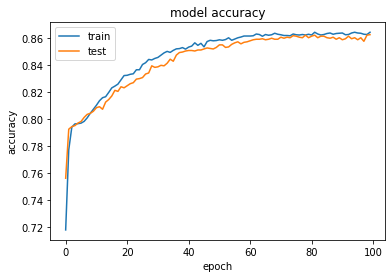

In [33]:
# list all data

print(model_history.history.keys())
# summarize history for accuracy
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

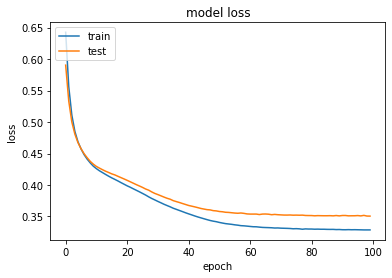

In [34]:
# summarize history for loss
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [35]:
# Part 3 - Making the predictions and evaluating the model

# Predicting the Test set results
y_pred = classifier.predict(X_test)
y_pred = (y_pred > 0.5)
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

In [36]:
cm

array([[1517,   78],
       [ 205,  200]])

In [37]:
# Calculate the Accuracy
from sklearn.metrics import accuracy_score
score=accuracy_score(y_pred,y_test)

In [38]:
score

0.8585